In [0]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# 국외 OECD

In [0]:
#OECD 국가 고용율
em_rat = 'https://stats.oecd.org/SDMX-JSON/data/STLABOUR/AUS+AUT+BEL+CAN+CHL+CZE+DNK+EST+FIN+FRA+DEU+GRC+HUN+ISL+IRL+ISR+ITA+JPN+KOR+LVA+LTU+LUX+MEX+NLD+NZL+NOR+POL+PRT+SVK+SVN+ESP+SWE+CHE+TUR+GBR+USA+OECD.LREM64TT.STSA.A/all?startTime=2014&endTime=2018'
#OECD 국가 실업율
uem_rat = 'https://stats.oecd.org/SDMX-JSON/data/LFS_SEXAGE_I_R/AUS+AUT+BEL+CAN+CHL+CZE+DNK+EST+FIN+FRA+DEU+GRC+HUN+ISL+IRL+ISR+ITA+JPN+KOR+LVA+LTU+LUX+MEX+NLD+NZL+NOR+POL+PRT+SVK+SVN+ESP+SWE+CHE+TUR+GBR+USA+OECD.MW.1564.UR.A/all?startTime=2014&endTime=2018'

In [0]:
em = requests.get(em_rat)
uem = requests.get(uem_rat)

In [0]:
em_dict = json.loads(em.content)
uem_dict = json.loads(uem.content)

In [341]:
type(em_dict),type(uem_dict)

(dict, dict)

- employment rate & unemployment rate keys and values

In [342]:
em_dict.keys() , uem_dict.keys()

(dict_keys(['header', 'dataSets', 'structure']),
 dict_keys(['header', 'dataSets', 'structure']))

In [343]:
em_dict

{'dataSets': [{'action': 'Information',
   'series': {'0:0:0:0': {'attributes': [0, None, 0, None],
     'observations': {'0': [71.56635, None],
      '1': [72.15796, None],
      '2': [72.4315, None],
      '3': [72.98936, None],
      '4': [73.76595, None]}},
    '10:0:0:0': {'attributes': [0, None, 0, None],
     'observations': {'0': [61.775, None],
      '1': [63.95, None],
      '2': [66.525, None],
      '3': [68.175, None],
      '4': [69.25, None]}},
    '11:0:0:0': {'attributes': [0, None, 0, None],
     'observations': {'0': [82.95, None],
      '1': [84.725, None],
      '2': [86.525, None],
      '3': [86.1, None],
      '4': [85.075, None]}},
    '12:0:0:0': {'attributes': [0, None, 0, None],
     'observations': {'0': [63.15, None],
      '1': [64.775, None],
      '2': [66.425, None],
      '3': [67.65, 0],
      '4': [68.65, None]}},
    '13:0:0:0': {'attributes': [0, None, 0, None],
     'observations': {'0': [55.7, None],
      '1': [56.275, None],
      '2': [57.25,

## Employment rate

### employment country code info
- id': 'AUS', 'name': 'Australia' : '0:0:0:0'
- id: 'AUT', 'name': 'Austria': '1:0:0:0'
- id: 'BEL', 'name': 'Belgium': '2:0:0:0'
- id: 'CAN', 'name': 'Canada': '3:0:0:0'
- id: 'CZE', 'name': 'Czech Republic': '4:0:0:0' 
- id: 'DNK', 'name': 'Denmark': '5:0:0:0'
- id: 'FIN', 'name': 'Finland': '6:0:0:0'
- id: 'FRA', 'name': 'France': '7:0:0:0'
- id: 'DEU', 'name': 'Germany': 8:0:0:0'
- id: 'GRC', 'name': 'Greece': '9:0:0:0'
- id: 'HUN', 'name': 'Hungary': '10:0:0:0'
- id: 'ISL', 'name': 'Iceland': '11:0:0:0'
- id: 'IRL', 'name': 'Ireland': '12:0:0:0'
- id: 'ITA', 'name': 'Italy': '13:0:0:0'
- id: 'JPN', 'name': 'Japan': '14:0:0:0'
- id: 'KOR', 'name': 'Korea': '15:0:0:0'
- id: 'LUX', 'name': 'Luxembourg': '16:0:0:0'
- id: 'MEX', 'name': 'Mexico': '17:0:0:0'
- id: 'NLD', 'name': 'Netherlands': '18:0:0:0'
- id: 'NZL', 'name': 'New Zealand': '19:0:0:0'
- id: 'NOR', 'name': 'Norway': '20:0:0:0'
- id: 'POL', 'name': 'Poland': '21:0:0:0'
- id: 'PRT', 'name': 'Portugal': '22:0:0:0'
- id: 'SVK', 'name': 'Slovak Republic': '23:0:0:0'
- id: 'ESP', 'name': 'Spain': '24:0:0:0'
- id: 'SWE', 'name': 'Sweden': '25:0:0:0'
- id: 'CHE', 'name': 'Switzerland': '26:0:0:0'
- id: 'TUR', 'name': 'Turkey': '27:0:0:0'
- id: 'GBR', 'name': 'United Kingdom': '28:0:0:0'
- id: 'USA', 'name': 'United States': '29:0:0:0'
- id: 'CHL', 'name': 'Chile': '30:0:0:0'
- id: 'EST', 'name': 'Estonia': '31:0:0:0'
- id: 'ISR', 'name': 'Israel': '32:0:0:0'
- id: 'SVN', 'name': 'Slovenia': '33:0:0:0'
- id: 'OECD', 'name': 'OECD - Total': '34:0:0:0'
- id: 'LVA', 'name': 'Latvia': '35:0:0:0'
- id: 'LTU', 'name': 'Lithuania': '36:0:0:0'

### years
- 2014 : 0
- 2015 : 1
- 2016 : 2
- 2017 : 3
- 2018 : 4

##고용률,실업률 값 추출

In [0]:
#고용률 값 추출 함수

def em_rate(user_dict):
  rate_list =[]    
  str_i = '0:0:0:0' #employment rate country code reset

  for i in range(len(user_dict['dataSets'][0]['series'])):  
    for j in range(len(user_dict['dataSets'][0]['series'][str_i]['observations'])):
      str_j = str(j)
      rate_list +=[user_dict['dataSets'][0]['series'][str_i]['observations'][str_j][0]]      
    num = str(i+1)
    num_s = str(i)
    str_i = str_i.replace(num_s,num,1)
 
  return rate_list

def uem_rate(user_dict):
  rate_list =[]    
  str_i = '0:0:0:0:0'  #unemployment rate country code reset
  for i in range(len(user_dict['dataSets'][0]['series'])):  
    for j in range(len(user_dict['dataSets'][0]['series'][str_i]['observations'])):
      str_j = str(j)
      rate_list +=[user_dict['dataSets'][0]['series'][str_i]['observations'][str_j][0]]
    num = str(i+1)
    num_s = str(i)
    str_i = str_i.replace(num_s,num,1)
  return rate_list

In [0]:
# 고용률 실업률 리스트화
em_list = em_rate(em_dict)
uem_list= uem_rate(uem_dict)

In [346]:
em_list,uem_list

([71.56635,
  72.15796,
  72.4315,
  72.98936,
  73.76595,
  71.075,
  71.1,
  71.55,
  72.2,
  73.025,
  61.9,
  61.8,
  62.3,
  63.125,
  64.45,
  72.30833,
  72.50833,
  72.56667,
  73.44167,
  73.80833,
  68.975,
  70.225,
  71.95,
  73.625,
  74.825,
  71.1,
  71.975,
  72.675,
  73.225,
  74.125,
  68.725,
  68.55,
  69.075,
  69.975,
  72.075,
  63.65,
  63.825,
  64.175,
  64.725,
  65.3,
  73.775,
  73.975,
  74.65,
  75.25,
  75.9,
  49.425,
  50.8,
  52.025,
  53.5,
  54.9,
  61.775,
  63.95,
  66.525,
  68.175,
  69.25,
  82.95,
  84.725,
  86.525,
  86.1,
  85.075,
  63.15,
  64.775,
  66.425,
  67.65,
  68.65,
  55.7,
  56.275,
  57.25,
  57.975,
  58.525,
  72.7607,
  73.39278,
  74.44646,
  75.32627,
  76.88937,
  65.56622,
  65.90981,
  66.07566,
  66.62926,
  66.61324,
  66.625,
  66.15,
  65.575,
  66.275,
  67.1,
  60.40805,
  60.74515,
  61.04717,
  61.12864,
  61.52908,
  73.125,
  74.15,
  74.825,
  75.85,
  77.2,
  74.25558,
  74.2999,
  75.59872,
  76.89251,
  

In [0]:
temp =uem_list[30]
temp1 = uem_list[31]
temp2 = uem_list[35]
temp3 = uem_list[34]

##컬럼순서 정리

In [0]:
#컬럼 순서 재정리
uem_list[30] = uem_list[32]
uem_list[31] = temp3
uem_list[32] = temp1
uem_list[34] = temp
uem_list[35] = uem_list[36]
uem_list[36] = temp2

In [0]:
#array 타입으로 변환
npem=np.array(em_list)
npuem=np.array(uem_list)

In [0]:
#resize로 로우는 국가별 컬럼은 14년도~18년도
npem = np.resize(npem,(37,5))
npuem = np.resize(npuem,(37,5))

In [0]:
dfem = pd.DataFrame(npem)
dfuem = pd.DataFrame(npuem)

In [0]:
em_uem = npem-npuem #고용률 - 실업률 연도가 열 국가가 행
em_uem_r = em_uem.T #연도가 행 국가가 열

In [0]:
pdcy = pd.DataFrame(em_uem)
pdyc = pd.DataFrame(em_uem_r)

In [354]:
pdcy

,0,1,2,3,4
0,65.351075,65.940004,66.563884,67.232694,68.308408
1,65.366384,65.277499,65.439040,66.621574,68.103608
2,53.302305,53.236345,54.412028,55.977751,58.446719
3,65.285384,65.509080,65.467150,67.047659,67.904625
4,62.781114,65.094438,67.923450,70.684009,72.540896
5,64.347008,65.665125,66.330244,67.348356,69.177134
6,59.778829,61.078892,59.567424,61.197700,63.346347
7,53.529564,53.828134,54.333585,55.561222,56.483140
8,68.698362,69.254194,70.437054,71.420479,72.435532
9,22.722999,25.684407,28.320847,31.846834,35.447272


In [355]:
pdyc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,65.351075,65.366384,53.302305,65.285384,62.781114,64.347008,59.778829,53.529564,68.698362,22.722999,54.008780,77.829237,50.437981,42.801150,68.993519,61.953227,60.738346,55.405115,65.650686,68.266728,71.611955,52.569304,48.125402,47.758476,31.439836,66.732760,73.775500,39.430677,65.517145,61.893879,54.655382,63.586136,61.244385,53.996150,58.168174,55.401672,54.554656
1,65.940004,65.277499,53.236345,65.509080,65.094438,65.665125,61.078892,53.828134,69.254194,25.684407,57.102163,80.562627,54.197254,44.176284,69.873819,62.218668,59.444294,56.243213,67.228097,68.286933,70.287850,55.328147,50.983776,51.186333,35.620490,67.950986,74.280004,39.642240,67.338573,63.342497,55.479726,66.532465,61.852575,56.119435,59.986856,58.783828,57.173157
2,66.563884,65.439040,54.412028,65.467150,67.923450,66.330244,59.567424,54.333585,70.437054,28.320847,61.376946,83.400842,57.151872,45.357586,71.172803,62.278362,59.268231,57.011659,68.766696,70.249397,69.413412,58.255640,53.746113,55.151009,39.803552,69.093580,74.513857,39.535157,68.496863,64.417362,55.727871,67.208912,61.777778,57.747998,60.007647,60.662832,59.474376
3,67.232694,66.621574,55.977751,67.047659,70.684009,67.348356,61.197700,55.561222,71.420479,31.846834,63.980050,83.189579,60.620811,46.546269,72.376117,62.863978,60.756392,57.560577,70.986104,71.955606,69.672501,61.158130,58.645226,57.976991,43.769254,70.037780,74.836714,40.399236,69.656106,65.704083,56.748425,69.835585,62.016426,62.609196,61.767400,62.800356,61.463609
4,68.308408,68.103608,58.446719,67.904625,72.540896,69.177134,63.346347,56.483140,72.435532,35.447272,65.501778,82.273648,62.467367,47.700828,74.320100,62.680213,61.489425,58.096379,73.369242,72.976275,70.828232,63.489844,62.439732,60.967196,47.049657,70.914064,75.227062,40.790643,70.445166,66.788438,57.157981,70.683664,61.685316,65.922567,62.972667,65.465167,64.806835


In [356]:
# 국가별 평균
for i in range(len(em_uem)):
  print(em_uem[i,:].mean())

66.67921284620856
66.16162098922564
55.0750296130611
66.2427794986892
67.80478137217806
66.57357340560584
60.99383832316322
54.74712888042096
70.44912414347121
28.804471659490495
60.39394327749352
81.45118649243867
56.97505688393672
45.316423301361816
71.3472715599811
62.39888960811154
60.33933749158264
56.863388451645825
69.20016491745847
70.34698785491042
70.36279021713864
58.160213179602636
54.78804967837023
54.608001124345584
39.536557881019334
68.9458340005266
74.52662763627573
39.95959055891368
68.29077044754845
64.42925191875706
55.95387698836798
67.56935259471415
61.71529608920656
59.27906898172925
60.580548749400165
60.62277119134708
59.4945265298911


In [357]:
#em_dict['dataSets'][0]['series'][*country code* = 'n:0:0:0']['observations'][*years* = 'n'(0~4)][0]
em_dict['dataSets'][0]['series']['0:0:0:0']['observations']['0'][0]

71.56635

In [358]:
#em_dict['structure']['dimensions']['observation'][0]['values'][*years* = n(0~4)]['id']
em_dict['structure']['dimensions']['observation'][0]['values'][0]['id']

'2014'

In [359]:
#em_dict['structure']['dimensions']['series'][0]['values'][*country_name*]['id']
em_dict['structure']['dimensions']['series'][0]['values'][4]['id']

'CZE'

In [360]:
len(em_dict['structure']['dimensions']['series'][0]['values'])

37

In [361]:
#employment country 추출
emcty =[]
for i in range(len(em_dict['structure']['dimensions']['series'][0]['values'])):
  emcty +=[em_dict['structure']['dimensions']['series'][0]['values'][i]['id']]

emcty

['AUS',
 'AUT',
 'BEL',
 'CAN',
 'CZE',
 'DNK',
 'FIN',
 'FRA',
 'DEU',
 'GRC',
 'HUN',
 'ISL',
 'IRL',
 'ITA',
 'JPN',
 'KOR',
 'LUX',
 'MEX',
 'NLD',
 'NZL',
 'NOR',
 'POL',
 'PRT',
 'SVK',
 'ESP',
 'SWE',
 'CHE',
 'TUR',
 'GBR',
 'USA',
 'CHL',
 'EST',
 'ISR',
 'SVN',
 'OECD',
 'LVA',
 'LTU']

In [362]:
#employment years 추출
emyears =[]
for i in range(len(em_dict['structure']['dimensions']['observation'][0]['values'][0]['id'])+1):
  emyears +=[em_dict['structure']['dimensions']['observation'][0]['values'][i]['id']]

emyears

['2014', '2015', '2016', '2017', '2018']

In [363]:
em1 =[]
for i in range(len(em_dict['structure']['dimensions']['series'][0]['values'])):
  em1 +=[em_dict['structure']['dimensions']['series'][0]['values'][i]['name']]

em1

['Australia',
 'Austria',
 'Belgium',
 'Canada',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Italy',
 'Japan',
 'Korea',
 'Luxembourg',
 'Mexico',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Poland',
 'Portugal',
 'Slovak Republic',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'United Kingdom',
 'United States',
 'Chile',
 'Estonia',
 'Israel',
 'Slovenia',
 'OECD - Total',
 'Latvia',
 'Lithuania']

##Unemployment rate

### unemploment country code info
- id': 'AUS', 'name': 'Australia': '0:0:0:0'
- id': 'AUT', 'name': 'Austria': '1:0:0:0'
- id': 'BEL', 'name': 'Belgium': '2:0:0:0'
- id': 'CAN', 'name': 'Canada': '3:0:0:0'
- id': 'CZE', 'name': 'Czech Republic': '4:0:0:0'
- id': 'DNK', 'name': 'Denmark': '5:0:0:0'
- id': 'FIN', 'name': 'Finland': '6:0:0:0'
- id': 'FRA', 'name': 'France': '7:0:0:0'
- id': 'DEU', 'name': 'Germany': '8:0:0:0'
- id': 'GRC', 'name': 'Greece': '9:0:0:0'
- id': 'HUN', 'name': 'Hungary': '10:0:0:0'
- id': 'ISL', 'name': 'Iceland': '11:0:0:0'
- id': 'IRL', 'name': 'Ireland': '12:0:0:0'
- id': 'ITA', 'name': 'Italy': '13:0:0:0'
- id': 'JPN', 'name': 'Japan': '14:0:0:0'
- id': 'KOR', 'name': 'Korea': '15:0:0:0'
- id': 'LUX', 'name': 'Luxembourg': '16:0:0:0'
- id': 'MEX', 'name': 'Mexico': '17:0:0:0'
- id': 'NLD', 'name': 'Netherlands': '18:0:0:0'
- id': 'NZL', 'name': 'New Zealand': '19:0:0:0'
- id': 'NOR', 'name': 'Norway': '20:0:0:0'
- id': 'POL', 'name': 'Poland': '21:0:0:0'
- id': 'PRT', 'name': 'Portugal': '22:0:0:0'
- id': 'SVK', 'name': 'Slovak Republic': '23:0:0:0'
- id': 'ESP', 'name': 'Spain': '24:0:0:0'
- id': 'SWE', 'name': 'Sweden': '25:0:0:0'
- id': 'CHE', 'name': 'Switzerland': '26:0:0:0'
- id': 'TUR', 'name': 'Turkey': '27:0:0:0'
- id': 'GBR', 'name': 'United Kingdom': '28:0:0:0'
- id': 'USA', 'name': 'United States': '29:0:0:0'
- id': 'OECD', 'name': 'OECD countries': '30:0:0:0'  -----diffrent 
- id': 'ISR', 'name': 'Israel': '31:0:0:0'
- id': 'CHL', 'name': 'Chile': '32:0:0:0'
- id': 'SVN', 'name': 'Slovenia': '33:0:0:0'
- id': 'EST', 'name': 'Estonia': '34:0:0:0'
- id': 'LTU', 'name': 'Lithuania': '35:0:0:0'
- id': 'LVA', 'name': 'Latvia': '36:0:0:0'           -------


### years
- 2014 : 0
- 2015 : 1
- 2016 : 2
- 2017 : 3
- 2018 : 4

In [364]:
#uem_dict['dataSets'][0]['series'][*country code* = 'n:0:0:0:0']['observations'][*years* = 'n'(0~4)][0]
uem_dict['dataSets'][0]['series']['0:0:0:0:0']['observations']['0'][0]

6.21527520513002

In [365]:
#uem_dict['structure']['dimensions']['observation'][0]['values'][*years* = n(0~4)]['id']
uem_dict['structure']['dimensions']['observation'][0]['values'][0]['id']

'2014'

In [366]:
#uem_dict['structure']['dimensions']['series'][0]['values'][*country_name*]['id']
uem_dict['structure']['dimensions']['series'][0]['values'][0]['id']

'AUS'

In [367]:
#unemployment years 추출
uemyears =[]
for i in range(len(uem_dict['structure']['dimensions']['observation'][0]['values'][0]['id'])+1):
  uemyears +=[uem_dict['structure']['dimensions']['observation'][0]['values'][i]['id']]

uemyears

['2014', '2015', '2016', '2017', '2018']

##시각화

In [368]:
pdyc.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,66.679213,66.161621,55.075030,66.242779,67.804781,66.573573,60.993838,54.747129,70.449124,28.804472,60.393943,81.451186,56.975057,45.316423,71.347272,62.398890,60.339337,56.863388,69.200165,70.346988,70.362790,58.160213,54.788050,54.608001,39.536558,68.945834,74.526628,39.959591,68.290770,64.429252,55.953877,67.569353,61.715296,59.279069,60.580549,60.622771,59.494527
std,1.149380,1.216457,2.187812,1.168983,3.978631,1.818027,1.507813,1.242429,1.531545,5.008388,4.783371,2.313421,4.846076,1.925235,2.099874,0.367788,0.949238,1.065305,3.051497,2.126125,0.888887,4.378368,5.774406,5.260896,6.231496,1.656466,0.550441,0.600945,1.946003,1.923554,1.005381,2.824262,0.289864,4.885246,1.846015,3.835162,3.933491
min,65.351075,65.277499,53.236345,65.285384,62.781114,64.347008,59.567424,53.529564,68.698362,22.722999,54.008780,77.829237,50.437981,42.801150,68.993519,61.953227,59.268231,55.405115,65.650686,68.266728,69.413412,52.569304,48.125402,47.758476,31.439836,66.732760,73.775500,39.430677,65.517145,61.893879,54.655382,63.586136,61.244385,53.996150,58.168174,55.401672,54.554656
25%,65.940004,65.366384,53.302305,65.467150,65.094438,65.665125,59.778829,53.828134,69.254194,25.684407,57.102163,80.562627,54.197254,44.176284,69.873819,62.218668,59.444294,56.243213,67.228097,68.286933,69.672501,55.328147,50.983776,51.186333,35.620490,67.950986,74.280004,39.535157,67.338573,63.342497,55.479726,66.532465,61.685316,56.119435,59.986856,58.783828,57.173157
50%,66.563884,65.439040,54.412028,65.509080,67.923450,66.330244,61.078892,54.333585,70.437054,28.320847,61.376946,82.273648,57.151872,45.357586,71.172803,62.278362,60.738346,57.011659,68.766696,70.249397,70.287850,58.255640,53.746113,55.151009,39.803552,69.093580,74.513857,39.642240,68.496863,64.417362,55.727871,67.208912,61.777778,57.747998,60.007647,60.662832,59.474376
75%,67.232694,66.621574,55.977751,67.047659,70.684009,67.348356,61.197700,55.561222,71.420479,31.846834,63.980050,83.189579,60.620811,46.546269,72.376117,62.680213,60.756392,57.560577,70.986104,71.955606,70.828232,61.158130,58.645226,57.976991,43.769254,70.037780,74.836714,40.399236,69.656106,65.704083,56.748425,69.835585,61.852575,62.609196,61.767400,62.800356,61.463609
max,68.308408,68.103608,58.446719,67.904625,72.540896,69.177134,63.346347,56.483140,72.435532,35.447272,65.501778,83.400842,62.467367,47.700828,74.320100,62.863978,61.489425,58.096379,73.369242,72.976275,71.611955,63.489844,62.439732,60.967196,47.049657,70.914064,75.227062,40.790643,70.445166,66.788438,57.157981,70.683664,62.016426,65.922567,62.972667,65.465167,64.806835


###5개 국가별로 섹션설정

In [369]:
pdyc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,65.351075,65.366384,53.302305,65.285384,62.781114,64.347008,59.778829,53.529564,68.698362,22.722999,54.008780,77.829237,50.437981,42.801150,68.993519,61.953227,60.738346,55.405115,65.650686,68.266728,71.611955,52.569304,48.125402,47.758476,31.439836,66.732760,73.775500,39.430677,65.517145,61.893879,54.655382,63.586136,61.244385,53.996150,58.168174,55.401672,54.554656
1,65.940004,65.277499,53.236345,65.509080,65.094438,65.665125,61.078892,53.828134,69.254194,25.684407,57.102163,80.562627,54.197254,44.176284,69.873819,62.218668,59.444294,56.243213,67.228097,68.286933,70.287850,55.328147,50.983776,51.186333,35.620490,67.950986,74.280004,39.642240,67.338573,63.342497,55.479726,66.532465,61.852575,56.119435,59.986856,58.783828,57.173157
2,66.563884,65.439040,54.412028,65.467150,67.923450,66.330244,59.567424,54.333585,70.437054,28.320847,61.376946,83.400842,57.151872,45.357586,71.172803,62.278362,59.268231,57.011659,68.766696,70.249397,69.413412,58.255640,53.746113,55.151009,39.803552,69.093580,74.513857,39.535157,68.496863,64.417362,55.727871,67.208912,61.777778,57.747998,60.007647,60.662832,59.474376
3,67.232694,66.621574,55.977751,67.047659,70.684009,67.348356,61.197700,55.561222,71.420479,31.846834,63.980050,83.189579,60.620811,46.546269,72.376117,62.863978,60.756392,57.560577,70.986104,71.955606,69.672501,61.158130,58.645226,57.976991,43.769254,70.037780,74.836714,40.399236,69.656106,65.704083,56.748425,69.835585,62.016426,62.609196,61.767400,62.800356,61.463609
4,68.308408,68.103608,58.446719,67.904625,72.540896,69.177134,63.346347,56.483140,72.435532,35.447272,65.501778,82.273648,62.467367,47.700828,74.320100,62.680213,61.489425,58.096379,73.369242,72.976275,70.828232,63.489844,62.439732,60.967196,47.049657,70.914064,75.227062,40.790643,70.445166,66.788438,57.157981,70.683664,61.685316,65.922567,62.972667,65.465167,64.806835


###★ country code

- 'AUS':0  --'Australia'
- 'AUT':1  --'Austria'
- 'BEL':2  --'Belgium'
- 'CAN':3  -- 'Canada'
- 'CZE':4  -- 'Czech Republic'
- 'DNK':5  -- 'Denmark'
- 'FIN':6  -- 'Finland'
- 'FRA':7  --'France'
- 'DEU':8  -- 'Germany'
- 'GRC':9  -- 'Greece'
- 'HUN':10  -- 'Hungary'
- 'ISL':11  -- 'Iceland'
- 'IRL':12  --'Ireland'
- 'ITA':13  --'Italy'
- 'JPN':14  --'Japan'
- 'KOR':15  --'Korea'
- 'LUX':16  --'Luxembourg'
- 'MEX':17  --'Mexico'
- 'NLD':18  --'Netherlands'
- 'NZL':19  -- 'New Zealand'
- 'NOR':20  --'Norway'
- 'POL':21  --'Poland'
- 'PRT':22  --'Portugal'
- 'SVK':23  -- 'Slovak Republic'
- 'ESP':24  -- 'Spain'
- 'SWE':25  -- 'Sweden'
- 'CHE':26  -- 'Switzerland'
- 'TUR':27  -- 'Turkey'
- 'GBR':28  --'United Kingdom'
- 'USA':29  -- 'United States'
- 'CHL':30  -- 'Chile'
- 'EST':31  -- 'Estonia'
- 'ISR':32  -- 'Israel'
- 'SVN':33  -- 'Slovenia'
- 'OECD:34  -- 'OECD - Total'
- 'LVA':35  -- 'Latvia'
- 'LTU':36  -- 'Lithuania'

###고용률 rank

In [0]:
rankem = dfem.rank(ascending = False)
rankuem = dfuem.rank(ascending = True)

In [371]:
rankem.T # 국가별 고용률 랭크

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,11.0,13.0,29.0,9.0,15.0,12.0,16.0,25.0,6.0,37.0,30.0,1.0,26.0,35.0,8.0,23.0,19.0,33.0,7.0,5.0,3.0,31.0,27.0,32.0,34.0,4.0,2.0,36.0,10.0,17.0,28.0,14.0,18.0,24.0,21.0,20.0,22.0
1,11.0,14.0,32.0,10.0,15.0,12.0,17.0,28.0,7.0,36.0,26.0,1.0,25.0,35.0,8.0,23.0,22.0,33.0,6.0,5.0,4.0,29.0,27.0,30.0,34.0,3.0,2.0,37.0,9.0,16.0,31.0,13.0,18.0,24.0,21.0,19.0,20.0
2,12.0,15.0,31.0,11.0,14.0,10.0,18.0,30.0,6.0,36.0,22.0,1.0,23.0,35.0,7.0,24.0,26.0,33.0,5.0,4.0,8.0,29.0,27.0,28.0,34.0,3.0,2.0,37.0,9.0,17.0,32.0,13.0,20.0,25.0,21.0,19.0,16.0
3,14.0,15.0,31.0,12.0,11.0,13.0,19.0,30.0,7.0,36.0,22.0,1.0,25.0,35.0,6.0,26.0,27.0,33.0,5.0,3.0,10.0,29.0,23.0,28.0,34.0,4.0,2.0,37.0,8.5,17.0,32.0,8.5,21.0,20.0,24.0,18.0,16.0
4,14.0,15.0,31.0,13.0,8.0,12.0,17.0,30.0,7.0,36.0,22.0,1.0,24.0,35.0,6.0,29.0,28.0,34.0,5.0,3.0,9.0,27.0,21.0,26.0,33.0,4.0,2.0,37.0,11.0,20.0,32.0,10.0,23.0,19.0,25.0,18.0,16.0


- 우리나라의 고용률은 OECD 국가 평균보다 높은편이다.

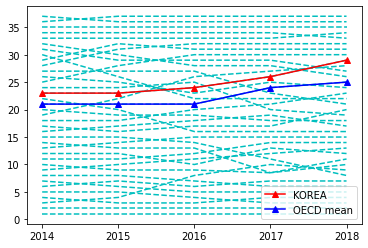

In [372]:
plt.plot(emyears,rankem.T.loc[:,0:],'--c')# 36개국
plt.plot(emyears,rankem.loc[15],'-r^',label='KOREA') #korea
plt.plot(emyears,rankem.loc[34],'-b^',label='OECD mean') # OECD 평균
plt.legend(loc='lower right')
plt.show()

In [373]:
rankuem.T # 국가별 실업률 랭크

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,13.0,8.0,24.0,18.0,12.0,17.0,25.0,29.0,6.0,37.0,22.0,7.0,32.0,33.0,3.0,1.0,9.0,5.0,19.0,10.0,2.0,26.0,35.0,34.0,36.0,23.0,4.0,28.0,15.0,14.0,21.0,11.0,16.0,27.0,20.0,30.0,31.0
1,14.0,12.0,26.0,22.0,8.0,16.0,23.0,29.0,6.0,37.0,19.0,3.0,32.0,34.0,1.0,2.0,18.0,4.0,20.0,13.0,5.0,25.0,35.0,33.0,36.0,24.0,7.0,31.0,11.0,10.0,21.0,9.0,17.0,27.0,15.0,28.0,30.0
2,14.0,16.0,25.0,23.0,4.0,19.0,29.0,31.0,6.0,37.0,12.0,1.0,28.0,35.0,2.0,3.0,18.0,5.0,15.0,13.0,7.0,17.0,34.0,30.0,36.0,24.0,11.0,33.0,10.0,9.0,20.0,8.0,21.0,27.0,22.0,26.0,32.0
3,18.0,17.0,27.0,22.0,2.0,19.0,30.0,32.0,6.0,37.0,7.0,1.0,26.0,35.0,3.0,5.0,16.0,4.0,12.0,13.0,9.0,15.0,33.0,29.0,36.0,24.0,14.0,34.0,11.0,10.0,21.0,8.0,25.0,23.0,20.0,28.0,31.0
4,21.0,16.0,24.0,23.0,1.0,17.0,32.0,33.0,5.0,37.0,6.0,3.0,25.0,34.0,2.0,9.0,22.0,4.0,7.0,14.0,11.0,8.0,29.0,28.0,36.0,27.0,15.0,35.0,13.0,10.0,20.0,12.0,30.0,18.0,19.0,26.0,31.0


- 우리나라의 실업률은 OECD 국가 평균보다 낮은편이다.

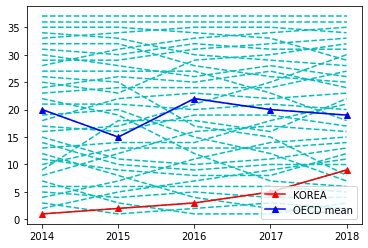

In [374]:
plt.plot(emyears,rankuem.T.loc[:,0:],'--c') #36개국
plt.plot(emyears,rankuem.loc[15],'-r^',label='KOREA') #korea
plt.plot(emyears,rankuem.loc[34],'-b^',label='OECD mean') # OECD 평균
plt.legend(loc='lower right')
plt.show()

In [0]:
#
section1 = em_uem_r[:,0:4]
section2 = em_uem_r[:,5:10]
section3 = em_uem_r[:,10:15]
section4 = em_uem_r[:,15:20]
section5 = em_uem_r[:,20:25]
section6 = em_uem_r[:,25:30]
section7 = em_uem_r[:,30:35]
section8 = em_uem_r[:,35:]

- 연도별 행복지수(고용률-실업률) 랭킹

In [0]:
rank =pdcy.rank(ascending = False)

- OECD 국가 

In [377]:
rank

,0,1,2,3,4
0,11.0,11.0,12.0,13.0,13.0
1,10.0,14.0,15.0,15.0,14.0
2,29.0,31.0,31.0,32.0,30.0
3,12.0,13.0,14.0,14.0,15.0
4,15.0,15.0,10.0,7.0,6.0
5,13.0,12.0,13.0,12.0,12.0
6,20.0,19.0,22.0,24.0,22.0
7,28.0,30.0,32.0,33.0,33.0
8,5.0,5.0,4.0,5.0,7.0
9,37.0,37.0,37.0,37.0,37.0


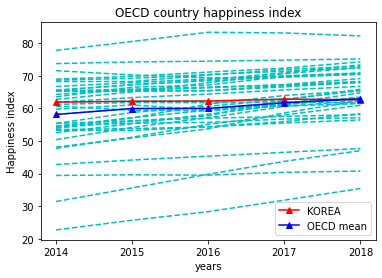

In [378]:
plt.plot(emyears,em_uem_r[:,0:],'--c',)
plt.plot(emyears,em_uem[15],'-r^',label='KOREA') #korea
plt.plot(emyears,em_uem[34],'-b^',label='OECD mean') # OECD 평균
plt.xlabel("years")
plt.ylabel("Happiness index")
plt.title("OECD country happiness index")
plt.legend(loc='lower right')
plt.show()

- 랭크 섹션 별 코드

---

- plt.plot(emyears,rank.T.loc[:,0:5],'--c',) 
- plt.plot(emyears,rank.T.loc[:,5:10],'--c',) 
- plt.plot(emyears,rank.T.loc[:,10:15],'--c',) 
- plt.plot(emyears,rank.T.loc[:,15:20],'--c',) 
- plt.plot(emyears,rank.T.loc[:,20:25],'--c',) 
- plt.plot(emyears,rank.T.loc[:,25:30],'--c',) 
- plt.plot(emyears,rank.T.loc[:,30:35],'--c',) 
- plt.plot(emyears,rank.T.loc[:,35:],'--c',) 

In [0]:
# plt.plot(emyears,rank.T.loc[:,0:5],'--c',) 
# plt.plot(emyears,rank.T.loc[:,5:10],'--c',) 
# plt.plot(emyears,rank.T.loc[:,10:15],'--c',) 
# plt.plot(emyears,rank.T.loc[:,15:20],'--c',) 
# plt.plot(emyears,rank.T.loc[:,20:25],'--c',) 
# plt.plot(emyears,rank.T.loc[:,25:30],'--c',) 
# plt.plot(emyears,rank.T.loc[:,30:35],'--c',) 
# plt.plot(emyears,rank.T.loc[:,35:],'--c',) 

- rank로 보았을 때 OECD 국가 중 우리나라의 행복지수는 2014~17년까지 평균을 넘었지만 2018년에 이하로 내려갔다.

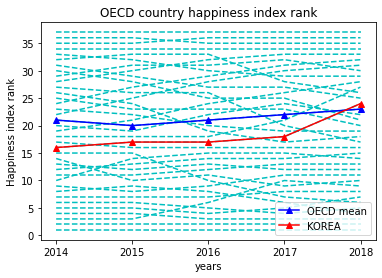

In [380]:
#낮은게 좋은순위
plt.plot(emyears,rank.T.loc[:,0:],'--c',) 
plt.plot(emyears,rank.loc[34],'-b^',label='OECD mean') # OECD mean rank
plt.plot(emyears,rank.loc[15],'-r^',label='KOREA') # korea rank
plt.xlabel("years")
plt.ylabel("Happiness index rank")
plt.title("OECD country happiness index rank")
plt.legend(loc='lower right')
plt.show()

#국내 통계청

In [381]:
cd ./content/drive/My Drive/01.data

[Errno 2] No such file or directory: './content/drive/My Drive/01.data'
/content/drive/My Drive/01.data


In [0]:
seoul = pd.read_excel('./서울통계표.xls')

In [0]:
seoul